In [3]:
## Figure 16. Advantage and limit of temporal coherence as the reliability measure
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
from matplotlib import colors, pyplot as plt, ticker
from pysar.objects import sensor, timeseries, ifgramStack
from pysar.utils import readfile, plot as pp, utils as ut, ptime
from pysar.simulation.plot import *
from pysar import view

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR')
os.chdir(work_dir)
print('Go to directory', work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

# spatialCoh vs tempCoh
spatial_coh_file = 'avgSpatialCoherence.h5'
temp_coh_file = 'UNW_COR/tempCoh_unwrapPhase.h5'     #'temporalCoherence.h5' with unw err cor
water_mask_file = 'waterMask.h5'

# lava flow
ts_file  = 'GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5'
vel_file = 'GEOCODE/geo_velocity.h5'
dem_file    = '../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84'
ifgram_file = 'INPUTS/ifgramStack.h5'
geom_file   = 'INPUTS/geometryRadar.h5'
lat, lon = 0.0232, -91.2838
ref_lat, ref_lon = 0.0243, -91.2891

Go to directory /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR


saved figure to file /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GalapagosSenDT128_spatial_temp_coh.png


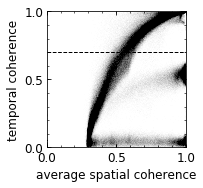

In [4]:
## Fig. 16a

## read data - spatial / temporal coherence
spatial_coh = readfile.read(spatial_coh_file)[0].flatten()
temp_coh = readfile.read(temp_coh_file)[0].flatten()
water_mask = readfile.read(water_mask_file)[0].flatten()
maskz = spatial_coh > 0.
maskz *= temp_coh > 0.
maskz = water_mask!=0   #pixels on land

## plot
fig, ax = plt.subplots(figsize=[2.5, 2.5])
ax.plot(spatial_coh[maskz], temp_coh[maskz], '.', ms=0.2, mfc='k', mec='none', alpha=0.5)
ax.plot([0, 1], [0.7, 0.7], 'k--', lw=1.)  #temporal coherence threshold
# axis format
ax.tick_params(which='both', direction='in', top=True, bottom=True, left=True, right=True, labelsize=font_size)
ax.set_xlabel('average spatial coherence', fontsize=font_size)
ax.set_ylabel('temporal coherence', fontsize=font_size)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# output
out_file = '{}_spatial_temp_coh.png'.format(proj_name)
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('saved figure to file', os.path.join(os.getcwd(), out_file))
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


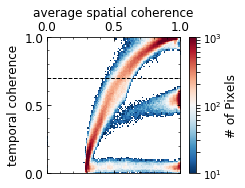

In [21]:
## Backup for Fig. 16a - obsolete version: 2D histogram

fig, ax = plt.subplots(figsize=[3, 2.5])
plt.hist2d(spatial_coh[maskz], temp_coh[maskz], bins=100, norm=colors.LogNorm(), cmin=1e1, vmax=1e3, cmap='RdBu_r')
ax.plot([0, 1], [0.7, 0.7], 'k--', lw=1.)     #temporal coherence threshold
#colorbar
cbar = plt.colorbar()
cbar.set_label('# of Pixels', fontsize=font_size)
# axis format
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.tick_params(which='both', direction='in', top=True, bottom=True, left=True, right=True, labelsize=font_size)
ax.set_xlabel('average spatial coherence', fontsize=font_size)
ax.set_ylabel('temporal coherence', fontsize=font_size)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# output
#plt.savefig('{}_coh_hist2d.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

save to file /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE/Wolf_lava_ts.png


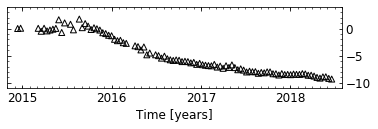

In [7]:
## Fig. 16b - Displacement time-series of the lava flow

# read data
dates, dis = ut.read_timeseries_lalo(lat, lon, ts_file, lookup_file=geom_file, ref_lat=ref_lat, ref_lon=ref_lon)

# plot
fig, ax = plt.subplots(figsize=[6, 1.5])
ax.scatter(dates, dis*100., marker='^', s=6**2, facecolors='none', edgecolors='k', linewidth=1.)
# axis format
pp.auto_adjust_xaxis_date(ax, dates[2:-1], fontsize=font_size)
ax.set_xlabel('Time [years]', fontsize=font_size)
#ax.set_ylabel('LOS displacement [cm]', fontsize=font_size)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_ylim([-11, 4])
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)

# save
out_file = 'GEOCODE/Wolf_lava_ts.png'
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file', os.path.join(os.getcwd(), out_file))
plt.show()

save to file: GEOCODE/Wolf_lava_cohMat.png


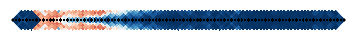

In [46]:
## Fig. 16c - Coherence matrix of the lava flow

# read data
obj = ifgramStack(ifgram_file)
obj.open(print_msg=False)
coord = ut.coordinate(obj.metadata, geom_file)
y, x = coord.geo2radar(lat, lon)[0:2]
box = (x, y, x+1, y+1)
coh = np.squeeze(readfile.read(ifgram_file, datasetName='coherence', box=box, print_msg=False)[0])

# plot
fig, ax = plt.subplots(figsize=[6, 1])
ax, im = pp.plot_rotate_diag_coherence_matrix(ax, coh.tolist(), obj.date12List, cmap='RdBu', disp_min=0.0)
# save
out_file = 'GEOCODE/Wolf_lava_cohMat.png'
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()

save to file: GEOCODE/Wolf_lava_cohMat_cbar.png


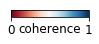

In [43]:
## Fig. 16c - Coherence matrix of the lava flow - colorbar
fig = plt.figure(figsize=(1.2, 0.1))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
cbar = mpl.colorbar.ColorbarBase(ax, cmap='RdBu', orientation='horizontal', ticks=[0, 1], extend='neither')
cbar.ax.set_xticklabels(['0', '1'])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('coherence', fontsize=font_size, labelpad=-14)
out_file = 'GEOCODE/Wolf_lava_cohMat_cbar.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()

save to file: GEOCODE/Wolf_lava_vel.png


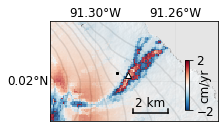

In [33]:
## Backup for Fig. 16b - LOS velocity of the lava flow

print_msg = False
fig, ax = plt.subplots(figsize=(3, 2))
## plot velocity
cmd  = 'view.py {} velocity -d {} '.format(vel_file, dem_file)
cmd += '--sub-lat 0.0 0.05 --sub-lon -91.323 -91.239 --wrap --wrap-range -2 2 --ref-lalo {} {} '.format(ref_lat, ref_lon)
cmd += '--notitle --notick --nocbar --ref-size 2 --fontsize 12 -c RdBu_r '
cmd += '--lalo-label --lalo-step 0.04 --lalo-loc 1 0 1 0 --scalebar 0.2 0.6 0.08 --scalebar-pad 0.1 '
d_v, atr, inps = view.prep_slice(cmd, print_msg=print_msg)
ax, inps, im, cbar = view.plot_slice(ax, d_v, atr, inps, print_msg=print_msg)
# plot POI
ax.plot(lon, lat, '^', ms=6, mec='k', mfc='w', mew=1.)
# plot colorbar
#cax = fig.add_axes([0.3, 0.05, 0.4, 0.025])
cax = fig.add_axes([0.75, 0.23, 0.02, 0.35])
cbar = plt.colorbar(im, cax=cax, ticks=[-2, 2])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('cm/yr', fontsize=font_size, labelpad=-16)

#save
out_file = 'GEOCODE/Wolf_lava_vel.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()